In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

#Obtendo dados do IBOVSPA


In [28]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=246)

In [30]:
dados_yahoo

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-19,18.620935,49.830002,44.316032,43.076244,27.681032,30.650726,29.418282,62.860466,27.144566,26.380169,38.259998,28.215216,14.05,41.760502,14.566652,7.190128,14.152863,10.752370,22.330626,48.565773,13.555085,53.224659,22.202377,11.75,41.652035,36.419788,36.214096,17.950001,19.169779,18.816231,22.654091,12.206239,47.077606,6.067562,34.900002,47.615215,32.302986,30.632477,45.059055,31.926025,11.990096,33.398422,28.246857,14.386139,17.433315,48.530964,37.481300,7.650000,16.986485,26.751926,25.591946,23.543837,27.035606,88.724403,23.040001,42.239964,40.064980,50.860191,26.677450,43.620308,31.930000,25.955843,11.742747,53.031223,15.468728,6.994871,42.523212,48.455940,6.730000,22.320585,30.701265
2019-08-20,18.455286,49.680000,44.569263,43.037807,27.395662,30.351601,29.356161,64.535431,27.409056,26.879507,37.889999,27.485764,14.06,43.045399,15.223150,7.516952,14.162458,11.091184,22.726385,47.723709,14.043734,53.512039,21.836866,12.06,40.877117,35.873238,36.061787,18.000000,18.781530,18.650612,23.152090,12.256020,47.834991,6.127244,35.400002,48.662468,31.745026,30.381313,45.207603,31.938786,11.804734,33.027325,27.992733,14.259689,17.551184,48.432724,36.193275,7.640000,16.714325,26.306059,25.352676,23.534037,27.495529,89.340469,23.180000,41.796345,39.516010,51.169724,27.075731,43.786011,31.150000,25.595610,11.605519,53.389069,15.458969,7.202934,42.708305,49.093880,7.060000,22.380001,32.104805
2019-08-21,18.318869,50.849998,44.627705,45.497658,28.071045,30.949848,29.542521,65.412323,27.546200,27.322315,38.360001,27.573298,14.20,43.490200,15.508583,7.873487,14.757359,11.144851,22.825323,48.369946,13.730998,55.384960,23.617559,12.30,41.116970,40.317055,40.317524,18.139999,19.014479,18.950674,23.640324,12.494967,48.881382,6.236658,35.299999,49.859337,32.205097,31.221748,45.554211,32.408440,11.951074,33.281239,28.588947,14.288869,17.472637,49.248127,36.203186,7.860000,17.718498,26.543856,26.702139,24.935106,29.545197,88.933060,23.570000,42.853558,39.932465,53.568607,28.308153,43.766518,30.400000,26.098043,11.732945,54.104767,16.317801,7.361457,43.010307,49.546917,7.180000,22.835520,32.242214
2019-08-22,17.997313,48.939999,44.286816,45.251427,27.490784,30.547901,28.930191,66.210388,27.526608,26.822975,39.560001,27.125900,14.08,42.561100,15.261209,7.546663,14.421528,10.655077,22.272434,48.125160,13.447582,54.998486,22.942770,12.30,40.600357,41.956612,41.939186,18.150000,19.024187,18.900015,23.943031,12.554704,50.077255,6.246605,33.400002,49.849358,31.304527,30.526217,45.177895,31.989529,11.755954,32.753895,28.403240,14.259689,16.932474,48.196949,34.112640,8.180000,18.018812,26.068264,26.443731,24.709759,30.345068,88.734337,22.799999,42.126781,39.440289,52.901173,27.661886,44.936222,29.400000,26.230761,11.625123,52.981522,16.727695,7.440720,42.757015,48.631599,6.900000,22.508734,31.908506
2019-08-23,17.860897,47.299999,42.689487,43.602390,26.777359,29.884222,28.566345,54.781219,26.595993,26.521488,38.590000,26.065762,13.80,41.880001,14.909173,7.170321,13.980149,10.265258,21.692631,46.989346,13.310760,52.114780,22.342960,11.96,40.342049,40.496223,41.356819,17.850000,18.519463,18.475252,23.464560,12.236106,49.758354,6.017828,33.400002,48.083984,31.167486,30.197769,44.900608,31.894323,11.590102,32.373032,27.025106,13.948427,16.352

In [31]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-20,-0.008896,-0.003010,0.005714,-0.000892,-0.010309,-0.009759,-0.002112,0.026646,0.009744,0.018929,-0.009671,-0.025853,0.000712,0.030768,0.045069,0.045455,0.000678,0.031511,0.017723,-0.017339,0.036049,0.005399,-0.016463,0.026383,-0.018605,-0.015007,-0.004206,0.002785,-0.020253,-0.008802,0.021983,0.004078,0.016088,0.009836,0.014327,0.021994,-0.017273,-0.008199,0.003297,0.000400,-0.015460,-0.011111,-0.008997,-0.008790,0.006761,-0.002024,-0.034364,-0.001307,-0.016022,-0.016667,-0.009349,-0.000416,0.017012,0.006944,0.006076,-0.010502,-0.013702,0.006086,0.014930,0.003799,-0.024428,-0.013879,-0.011686,0.006748,-0.000631,0.029745,0.004353,0.013165,0.049034,0.002662,0.045716
2019-08-21,-0.007392,0.023551,0.001311,0.057156,0.024653,0.019711,0.006348,0.013588,0.005004,0.016474,0.012404,0.003185,0.009957,0.010333,0.018750,0.047431,0.042005,0.004839,0.004353,0.013541,-0.022269,0.035000,0.081545,0.019900,0.005868,0.123876,0.118012,0.007778,0.012403,0.016089,0.021088,0.019496,0.021875,0.017857,-0.002825,0.024595,0.014493,0.027663,0.007667,0.014705,0.012397,0.007688,0.021299,0.002046,-0.004475,0.016836,0.000274,0.028796,0.060079,0.009040,0.053228,0.059534,0.074545,-0.004560,0.016825,0.025294,0.010539,0.046881,0.045518,-0.000445,-0.024077,0.019630,0.010980,0.013405,0.055556,0.022008,0.007071,0.009228,0.016997,0.020354,0.004280
2019-08-22,-0.017553,-0.037561,-0.007639,-0.005412,-0.020671,-0.012987,-0.020727,0.012201,-0.000711,-0.018276,0.031283,-0.016226,-0.008451,-0.021363,-0.015951,-0.041509,-0.022757,-0.043946,-0.024223,-0.005061,-0.020641,-0.006978,-0.028572,0.000000,-0.012564,0.040667,0.040222,0.000551,0.000511,-0.002673,0.012805,0.004781,0.024465,0.001595,-0.053824,-0.000200,-0.027964,-0.022277,-0.008261,-0.012926,-0.016327,-0.015845,-0.006496,-0.002042,-0.030915,-0.021345,-0.057745,0.040712,0.016949,-0.017917,-0.009677,-0.009037,0.027073,-0.002235,-0.032669,-0.016960,-0.012325,-0.012459,-0.022830,0.026726,-0.032895,0.005085,-0.009190,-0.020761,0.025119,0.010767,-0.005889,-0.018474,-0.038997,-0.014310,-0.010350
2019-08-23,-0.007580,-0.033510,-0.036068,-0.036442,-0.025951,-0.021726,-0.012577,-0.172619,-0.033808,-0.011240,-0.024520,-0.039082,-0.019886,-0.016003,-0.023067,-0.049869,-0.030606,-0.036585,-0.026032,-0.023601,-0.010174,-0.052432,-0.026144,-0.027642,-0.006362,-0.034807,-0.013886,-0.016529,-0.026531,-0.022474,-0.019984,-0.025377,-0.006368,-0.036624,0.000000,-0.035414,-0.004378,-0.010760,-0.006138,-0.002976,-0.014108,-0.011628,-0.048520,-0.021828,-0.034223,-0.020587,-0.018879,-0.024450,-0.024479,-0.019384,-0.031487,-0.037272,-0.021417,-0.003360,-0.037281,-0.019494,-0.015359,-0.041324,0.028253,0.054230,-0.047619,-0.015540,-0.008432,0.001688,-0.054309,-0.037284,-0.013898,-0.007604,-0.015942,-0.022437,-0.053214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [32]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-08-20,0.991104,0.996990,1.005714,0.999108,0.989691,0.990241,0.997888,1.026646,1.009744,1.018929,0.990329,0.974147,1.000712,1.030768,1.045069,1.045455,1.000678,1.031511,1.017723,0.982661,1.036049,1.005399,0.983537,1.026383,0.981395,0.984993,0.995794,1.002785,0.979747,0.991198,1.021983,1.004078,1.016088,1.009836,1.014327,1.021994,0.982727,0.991801,1.003297,1.000400,0.984540,0.988889,0.991003,0.991210,1.006761,0.997976,0.965636,0.998693,0.983978,0.983333,0.990651,0.999584,1.017012,1.006944,1.006076,0.989498,0.986298,1.006086,1.014930,1.003799,0.975572,0.986121,0.988314,1.006748,0.999369,1.029745,1.004353,1.013165,1.049034,1.002662,1.045716
2019-08-21,0.983778,1.020470,1.007033,1.056212,1.014090,1.009759,1.004223,1.040596,1.014796,1.035714,1.002614,0.977249,1.010676,1.041419,1.064664,1.095041,1.042712,1.036502,1.022153,0.995968,1.012978,1.040588,1.063740,1.046809,0.987154,1.107010,1.113310,1.010585,0.991899,1.007145,1.043534,1.023654,1.038315,1.027869,1.011461,1.047130,0.996970,1.019237,1.010989,1.015110,0.996745,0.996491,1.012111,0.993239,1.002256,1.014777,0.965900,1.027451,1.043094,0.992222,1.043381,1.059093,1.092825,1.002352,1.023003,1.014526,0.996692,1.053252,1.061127,1.003352,0.952083,1.005479,0.999165,1.020244,1.054890,1.052408,1.011455,1.022515,1.066865,1.023070,1.050192
2019-08-22,0.966510,0.982139,0.999341,1.050496,0.993127,0.996645,0.983409,1.053291,1.014074,1.016786,1.033978,0.961393,1.002135,1.019171,1.047681,1.049587,1.018983,0.990951,0.997394,0.990928,0.992069,1.033327,1.033347,1.046809,0.974751,1.152028,1.158090,1.011142,0.992405,1.004453,1.056897,1.028548,1.063717,1.029508,0.957020,1.046921,0.969091,0.996531,1.002637,1.001989,0.980472,0.980702,1.005536,0.991210,0.971271,0.993117,0.910124,1.069281,1.060773,0.974444,1.033283,1.049521,1.122411,1.000112,0.989583,0.997320,0.984408,1.040129,1.036901,1.030167,0.920764,1.010592,0.989983,0.999063,1.081388,1.063739,1.005498,1.003625,1.025260,1.008429,1.039322
2019-08-23,0.959184,0.949227,0.963297,1.012214,0.967354,0.974992,0.971041,0.871473,0.979791,1.005357,1.008625,0.923819,0.982206,1.002862,1.023514,0.997245,0.987797,0.954697,0.971430,0.967540,0.981975,0.979147,1.006332,1.017872,0.968549,1.111929,1.142009,0.994429,0.966076,0.981878,1.035776,1.002447,1.056943,0.991803,0.957020,1.009845,0.964848,0.985809,0.996484,0.999007,0.966640,0.969298,0.956747,0.969574,0.938031,0.972672,0.892942,1.043137,1.034807,0.955555,1.000748,1.010404,1.098373,0.996752,0.952691,0.977878,0.969289,0.997147,1.066197,1.086033,0.876918,0.994887,0.981636,1.000750,1.022659,1.024079,0.991523,0.995993,1.008915,0.985803,0.984015
...,...,...,...,...,...,...,.

#Resultados

In [33]:
carteira = random.sample(list(dados_yahoo.columns) , k=5)
carteira = 10000 * retorno_acumulado.loc[: , carteira]
carteira['saldo'] = carteira.sum(axis=1)
carteira["retorno"] = carteira['saldo'].pct_change()
carteira

,BBDC3.SA,KLBN11.SA,SMLS3.SA,IGTA3.SA,MRFG3.SA,saldo,retorno
Date,,,,,,,
2019-08-19,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2019-08-20,9896.907792,9912.103181,10149.295039,10032.967430,9986.927806,49978.201248,-0.000436
2019-08-21,10140.895303,9932.386297,10611.266430,10109.890305,10274.509850,51068.948185,0.021824
2019-08-22,9931.271172,9912.103181,10369.014291,10026.374113,10692.810723,50931.573480,-0.002690
2019-08-23,9673.540652,9695.740658,10661.971862,9964.835644,10431.372444,50427.461260,-0.009898
...,...,...,...,...,...,...,...
2020-08-12,7261.290060,17044.184406,5716.438377,7929.593570,19241.830175,57193.336587,0.013445
2020-08-13,7048.147664,17551.616975,5581.493075,7538.995430,19320.260848,57040.513991,-0.002672
2020-08-14,7105.948921,17482.105355,5615.229132,7716.540039,19947.712469,57867.535917,0.014499


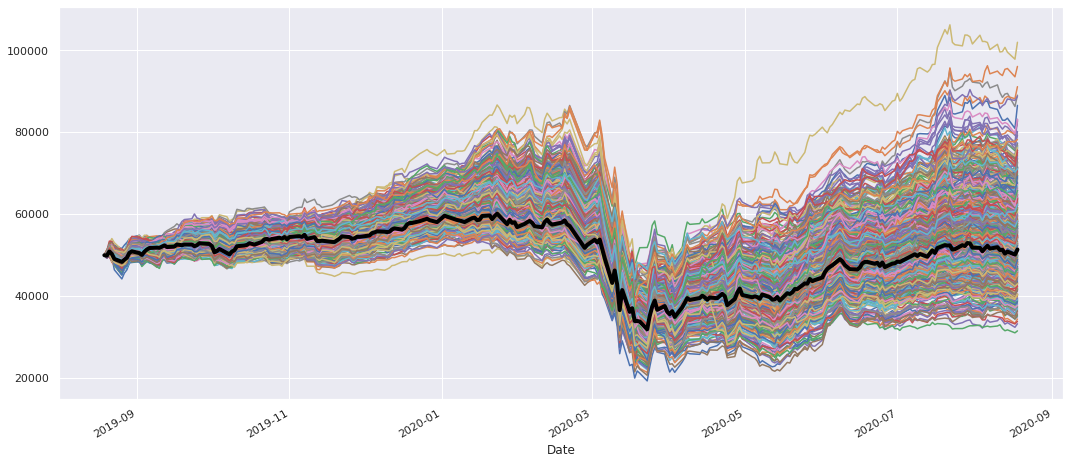

In [34]:
for i in range(500):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black');